# Figure 2:  Decay as a function of the number of samples and sites

These series of plots shows how the overall root mean squared error (RMSE) decays as we increase the number of totol samples and the number of sites for different choices of samples per site. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import smpsite as smp

%matplotlib inline

## 1. Figures a & b: Decay as a function of the number of total samples $n$

In [2]:
df = pd.read_csv('../../outputs/fig2ab_2000sim_summary.csv')
df

,Unnamed: 0,Unnamed: 1,error_angle_mean,error_angle_median,error_angle_25,error_angle_75,error_angle_95,error_angle_std,error_angle_S2,error_angle_S,...,N,n0,kappa_within_site,site_lat,site_long,outlier_rate,secular_method,kappa_secular,ignore_outliers,total_simulations
0,0,0,4.418425,4.068730,2.574621,5.931969,8.843983,2.389484,25.229262,5.022874,...,10,3,50,30.0,0.0,0.0,G,NaN,False,2000
1,1,0,3.564401,3.307917,2.101149,4.756044,7.050093,1.916513,16.376137,4.046744,...,24,1,50,30.0,0.0,0.0,G,NaN,False,2000
2,2,0,7.039044,6.605681,4.265727,9.247352,13.943720,3.726799,63.430232,7.964310,...,4,3,50,30.0,0.0,0.0,G,NaN,False,2000
3,3,0,1.238532,1.158910,0.764595,1.644945,2.368667,0.645502,1.950427,1.396577,...,229,1,50,30.0,0.0,0.0,G,NaN,False,2000
4,4,0,1.129028,1.053866,0.674889,1.512438,2.201005,0.590024,1.622659,1.273836,...,277,1,50,30.0,0.0,0.0,G,NaN,False,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,771,0,1.534570,1.439038,0.929228,2.031131,2.954905,0.789545,2.977974,1.725681,...,87,3,50,30.0,0.0,0.0,G,NaN,False,2000
772,772,0,1.215589,1.158157,0.741750,1.638733,2.333324,0.615145,1.855872,1.362304,...,242,1,50,30.0,0.0,0.0,G,NaN,False,2000
773,773,0,2.524885,2.360240,1.513693,3.397144,4.986915,1.338083,8.164615,2.857379,...,35,2,50,30.0,0.0,0.0,G,NaN,False,2000
774,774,0,5.089531,4.711650,2.986586,6.697563,10.387042,2.796089,33.717527,5.806680,...,11,1,50,30.0,0.0,0.0,G,NaN,False,2000


In [3]:
df["error_kappa_theoretical"] = df.apply(lambda row: smp.kappa_theoretical(smp.Params(N=row.N, 
                                                                                      n0=row.n0, 
                                                                                      kappa_within_site=row.kappa_within_site,
                                                                                      site_lat=row.site_lat,
                                                                                      site_long=row.site_long, 
                                                                                      outlier_rate=row.outlier_rate, 
                                                                                      secular_method=row.secular_method, 
                                                                                      kappa_secular=row.kappa_secular)), axis=1)
df["error_angle_theoretical"] = df.apply(lambda row: float(smp.kappa2angular(row.error_kappa_theoretical)), axis=1)

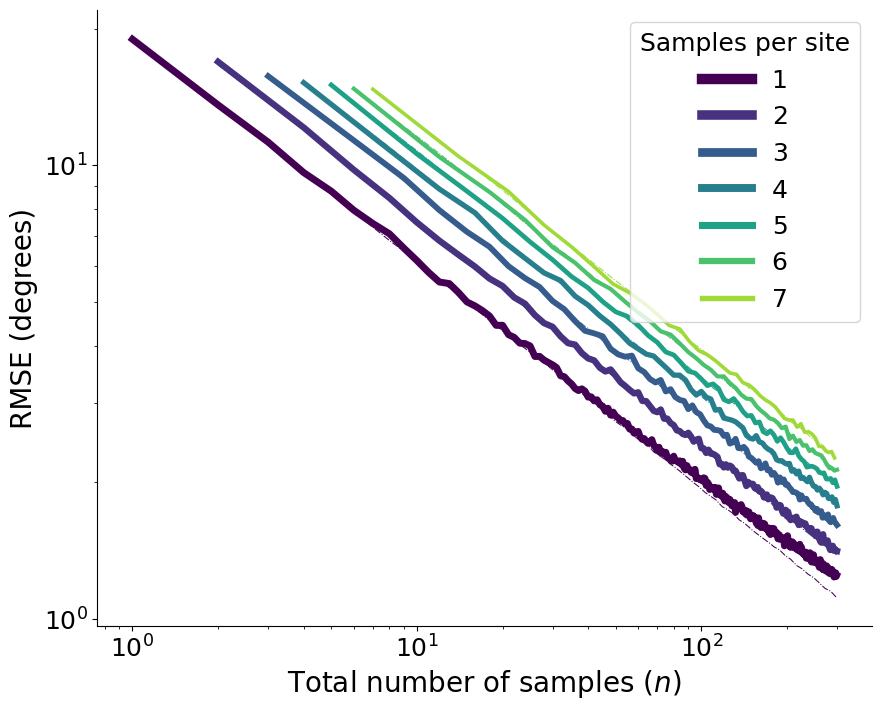

In [4]:
fig, ax = plt.subplots(figsize=(10,8))

log_scale = True 

import matplotlib
palette = {x : matplotlib.cm.get_cmap('viridis')((x-1)/7) for x in np.arange(1,8)}

sizes = {i:5 - 0.4*(i-1) for i in range(1,8)}

sns.lineplot(ax=ax, data=df, x='n_tot', y='error_angle_S', hue='n0', size='n0', palette=palette, sizes=sizes)
sns.lineplot(ax=ax, data=df, x='n_tot', y='error_angle_theoretical', hue='n0', size=0.1, linewidth=2, palette=palette, legend=False, linestyle='dashdot')
# plt.xscale("log")

plt.xlabel("Total number of samples ($n$)", fontsize=20)
plt.ylabel("RMSE (degrees)", fontsize=20)
plt.yticks(fontsize=18)

leg = plt.legend(title="Samples per site", loc="upper right", fontsize=18, title_fontsize=18)
for i in range(7):
    leg.get_lines()[i].set_linewidth(1.5*sizes[i+1])
ax.spines[['right', 'top']].set_visible(False)

if log_scale:
    plt.xscale("log")
    plt.yscale("log")
    plt.xticks(fontsize=18)
    plt.savefig("Figure2b_log.pdf", format="pdf", bbox_inches='tight')
    plt.savefig("Figure2b_log.png", format="png", bbox_inches='tight')
else:
    plt.xticks([0, 50, 100, 150, 200, 250, 300], fontsize=18)
    plt.xlim(0, 300)
    plt.ylim(0, 8)
    plt.savefig("Figure2a.pdf", format="pdf", bbox_inches='tight')
    plt.savefig("Figure2a.png", format="png", bbox_inches='tight')

In [7]:
df["error_kappa_theoretical"] = df.apply(lambda row: smp.kappa_theoretical(smp.Params(N=row.N, 
                                                                                      n0=row.n0, 
                                                                                      kappa_within_site=row.kappa_within_site,
                                                                                      site_lat=row.site_lat,
                                                                                      site_long=row.site_long,   
                                                                                      outlier_rate=row.outlier_rate, 
                                                                                      secular_method=row.secular_method, 
                                                                                      kappa_secular=row.kappa_secular)), axis=1)
df["error_angle_theoretical"] = df.apply(lambda row: float(smp.kappa2angular(row.error_kappa_theoretical)), axis=1)

## Figure c & d: Decay as a function of the number of sites

In [8]:
df = pd.read_csv('../../outputs/fig2cd_2000sim_summary.csv')
df

,Unnamed: 0,Unnamed: 1,error_angle_mean,error_angle_median,error_angle_25,error_angle_75,error_angle_95,error_angle_std,error_angle_S2,error_vgp_scatter,...,N,n0,kappa_within_site,site_lat,site_long,outlier_rate,secular_method,kappa_secular,ignore_outliers,total_simulations
0,0,0,3.507303,3.326483,2.133586,4.603671,6.762467,1.803921,15.553678,2.244988,...,14,6,50,30.0,0.0,0.0,G,NaN,False,2000
1,1,0,1.824976,1.716661,1.092270,2.457725,3.515834,0.944936,4.222996,1.319370,...,70,2,50,30.0,0.0,0.0,G,NaN,False,2000
2,2,0,2.755531,2.596467,1.664463,3.666091,5.281088,1.430537,9.638365,2.061391,...,30,2,50,30.0,0.0,0.0,G,NaN,False,2000
3,3,0,3.865201,3.690096,2.323372,5.129322,7.579034,2.014398,18.995552,2.327094,...,12,7,50,30.0,0.0,0.0,G,NaN,False,2000
4,4,0,2.231617,2.061765,1.363932,2.949242,4.350726,1.154125,6.311454,1.434520,...,36,5,50,30.0,0.0,0.0,G,NaN,False,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,352,0,2.462295,2.297074,1.502908,3.300662,4.778267,1.280982,7.702988,1.632359,...,32,4,50,30.0,0.0,0.0,G,NaN,False,2000
353,353,0,1.979653,1.858608,1.168008,2.691842,3.864772,1.057756,5.037314,1.223433,...,44,7,50,30.0,0.0,0.0,G,NaN,False,2000
354,354,0,1.361468,1.278077,0.825126,1.807194,2.679220,0.722299,2.375049,0.878151,...,98,4,50,30.0,0.0,0.0,G,NaN,False,2000
355,355,0,2.096491,1.979148,1.295316,2.769094,4.051376,1.073121,5.546288,1.378519,...,46,3,50,30.0,0.0,0.0,G,NaN,False,2000


In [9]:
df["error_angle_S"] = df["error_angle_S2"] ** .5 

df["error_kappa_theoretical"] = df.apply(lambda row: smp.kappa_theoretical(smp.Params(N=row.N, 
                                                                                    n0=row.n0, 
                                                                                    kappa_within_site=row.kappa_within_site,
                                                                                    site_lat=row.site_lat,
                                                                                    site_long=row.site_long, 
                                                                                    outlier_rate=row.outlier_rate, 
                                                                                    secular_method=row.secular_method, 
                                                                                    kappa_secular=row.kappa_secular)), axis=1)
df["error_angle_theoretical"] = df.apply(lambda row: float(smp.kappa2angular(row.error_kappa_theoretical)), axis=1)

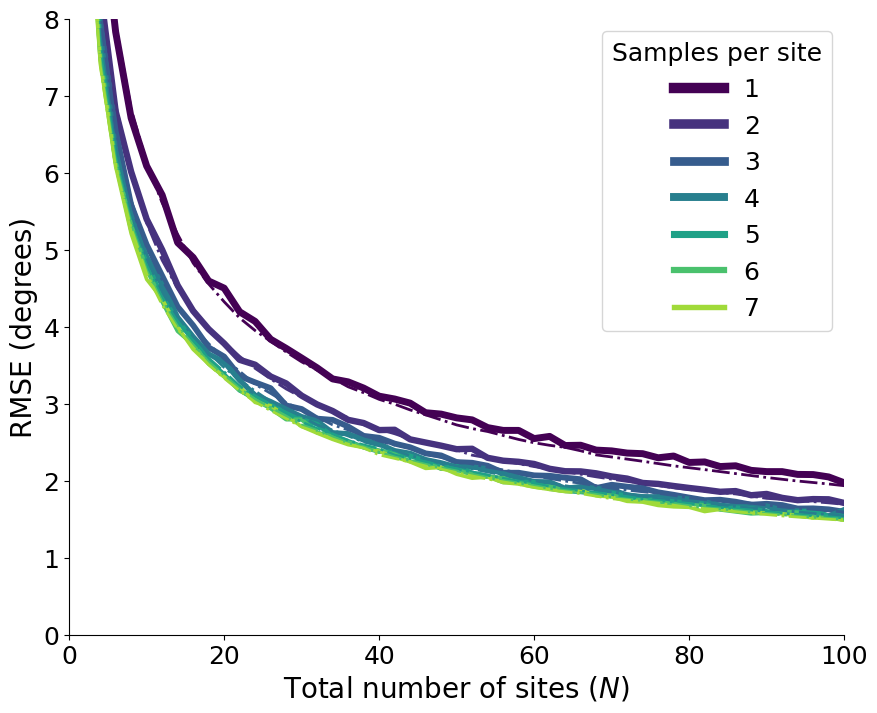

In [10]:
fig, ax = plt.subplots(figsize=(10,8))

log_scale = False
plot_theory = True

import matplotlib
palette = {x : matplotlib.cm.get_cmap('viridis')((x-1)/7) for x in np.arange(1,8)}

sizes = {i:5 - 0.4*(i-1) for i in range(1,8)}

sns.lineplot(ax=ax, data=df, x='N', y='error_angle_S', hue='n0', size='n0', palette=palette, sizes=sizes)
if plot_theory:
    sns.lineplot(ax=ax, data=df, x='N', y='error_angle_theoretical', hue='n0', linewidth=2, palette=palette, legend=False, linestyle='dashdot')


plt.xlabel("Total number of sites ($N$)", fontsize=20)
plt.ylabel("RMSE (degrees)", fontsize=20)
plt.yticks(fontsize=18)

leg = plt.legend(title="Samples per site", loc="upper right", fontsize=18, title_fontsize=18)
for i in range(7):
    leg.get_lines()[i].set_linewidth(1.5*sizes[i+1])
ax.spines[['right', 'top']].set_visible(False)

if log_scale:
    plt.xscale("log")
    plt.yscale("log")
    plt.xticks(fontsize=18)
    plt.savefig("Figure2d_log.pdf", format="pdf", bbox_inches='tight')
    plt.savefig("Figure2d_log.png", format="png", bbox_inches='tight')
else:
    plt.xticks(np.arange(0, 101, 20), fontsize=18)
    plt.xlim(0, 100)
    plt.ylim(0, 8)
    plt.savefig("Figure2c.pdf", format="pdf", bbox_inches='tight')
    plt.savefig("Figure2c.png", format="png", bbox_inches='tight')
